# mnist (텐서플로 2.x)

In [1]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train.shape:",X_train.shape)
print("X_train.reshape:",X_train.reshape(-1,28,28, 1).shape)
# X_train.reshape(60000, 28,28, 1)
X_train = X_train.reshape(-1, 28,28, 1)

X_train.shape: (60000, 28, 28)
X_train.reshape: (60000, 28, 28, 1)


In [4]:
print("y_train.shape:", y_train.shape)
print("y_train.reshape :",y_train.reshape(60000, 1).shape)

y_train = y_train.reshape(-1,1)

y_train.shape: (60000,)
y_train.reshape : (60000, 1)


In [5]:
enc = OneHotEncoder()
enc.fit(y_train)

y_train_onehot = enc.transform(y_train).toarray()

y_train_onehot = np.array(y_train_onehot, dtype="float32")

In [6]:
model = Sequential()

model.add(Conv2D(
                 32, 
                 kernel_size=(3,3), 
                 strides=1,
                 input_shape=(28, 28, 1),
                 padding="SAME",
                 activation="relu"
                 )
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


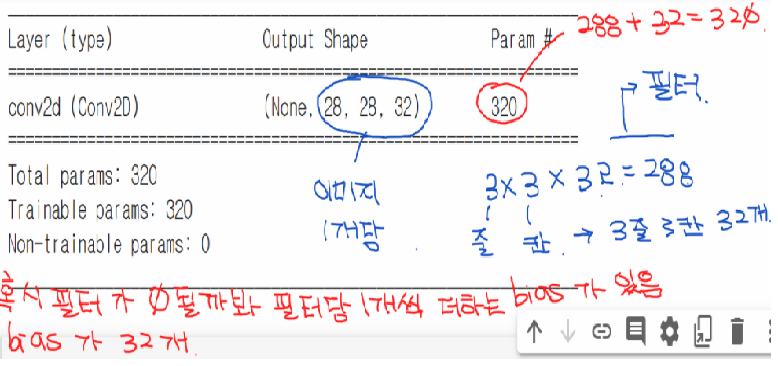

In [7]:
model.add(Conv2D(
                 64, 
                 kernel_size=(3,3), 
                 strides=1,
                 padding="SAME",
                 activation="relu"
                 )
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


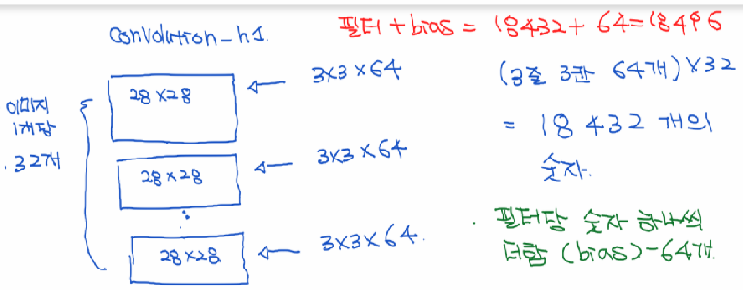

In [8]:
model.add(MaxPooling2D(pool_size=2, strides=1, padding="SAME"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(Dense(512, activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
Total params: 25,709,440
Trainable params: 25,709,440
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['acc']
)

In [13]:
model.fit(X_train, y_train_onehot, epochs = 5, batch_size = 100)

Epoch 1/5
600/600 [==============================] - 51s 35ms/step - loss: 5.7107 - acc: 0.9406
Epoch 2/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0479 - acc: 0.9848
Epoch 3/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0327 - acc: 0.9897
Epoch 4/5
600/600 [==============================] - 21s 34ms/step - loss: 0.0298 - acc: 0.9905
Epoch 5/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0255 - acc: 0.9921


In [14]:
model.evaluate(X_train, y_train_onehot)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0210 - acc: 0.9931


[0.02102872170507908, 0.993149995803833]

In [20]:
y_test = y_test.reshape(-1,1)

In [24]:
X_test =  X_test.reshape(-1, 28, 28,1)

In [21]:
y_test_onehot = enc.transform(y_test).toarray()

y_test_onehot = np.array(y_test_onehot, dtype="float32")

In [25]:
model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 3s 8ms/step - loss: 0.0944 - acc: 0.9801


[0.09444431960582733, 0.9800999760627747]

In [37]:
predict = model.predict(X_test)

predict01 = np.argmax(predict, 1)

target = np.argmax(y_test_onehot, 1)

predict02 = (predict01 ==target)


# 데이터 준비 

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [26]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/test'

In [27]:
IM_WIDTH = 220
IM_HEIGHT = 220

In [36]:
datagen = ImageDataGenerator()

In [37]:
train_generator = datagen.flow_from_directory(train_path,
                            target_size = (IM_WIDTH, IM_HEIGHT),
                            batch_size = 10,
                            class_mode = 'categorical',
                            shuffle =False
                            )

Found 150 images belonging to 3 classes.


In [16]:
train_generator.n

150

In [38]:
img, label = train_generator.next()

In [ ]:
# 폴더순서에 따라 원핫인코딩
label


In [39]:
img.shape


(10, 220, 220, 3)

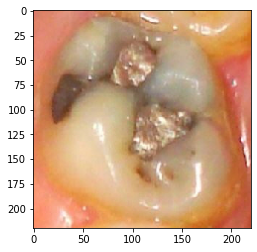

In [45]:
# 이미지 그래프 그릴떄
# 숫자가 실수면 0~1 사이값
# 숫자가 정수면 0~255사이 값
plt.imshow(img[0]/ 255)

# 데이터 증강

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/test'

In [3]:
IM_WIDTH = 220
IM_HEIGHT = 220

In [4]:
datagen = ImageDataGenerator(
                rotation_range = 360,
                width_shift_range = 1.0,
                height_shift_range = 1.0,
                horizontal_flip = True,
                vertical_flip = True
            )

In [5]:
train_generator = datagen.flow_from_directory(
                        train_path,
                        target_size = (IM_HEIGHT, IM_WIDTH),
                        batch_size = 1,
                        class_mode = 'categorical',
                        shuffle = False
)

Found 150 images belonging to 3 classes.


In [6]:
img, label = train_generator.next()

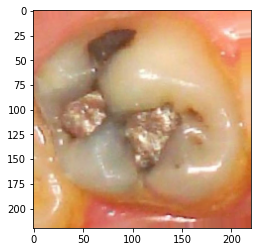

In [8]:
plt.imshow(img[0]/255)

In [19]:
index = 0

all_generate_img = []

In [20]:
# 증강데이터 20개 저장
for generate_img in datagen.flow(img):
  all_generate_img.append(generate_img)

  index += 1

  if index > 20:
    break

In [ ]:
all_generate_img[0][0]

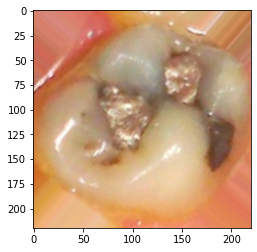

In [28]:
plt.imshow(all_generate_img[0][0]/255)

# 실습

## 텐서플로 2.x 를 이용한  CNN MNIST

- 538 ~ 557

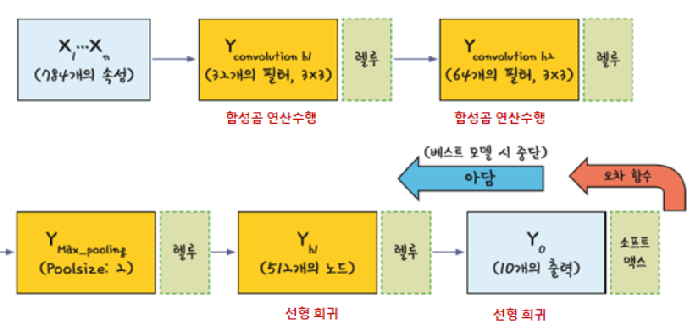

In [53]:
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [39]:
# 1. shape 확인
# X_train, X_test
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)

# 4차원 아님 -> 따라서 reshape
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

# reshape 확인
print("X_train.reshape : ", X_train.shape)
print("X_train.reshape : ", X_test.shape)


# y 동일
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

# 2차원 아님 -> 따라서 reshape
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# reshape 확인
print("y_train.reshape:", y_train.shape)
print("y_test.reshape:", y_test.shape)

X_train.shape :  (60000, 28, 28)
X_test.shape :  (10000, 28, 28)
X_train.reshape :  (60000, 28, 28, 1)
X_train.reshape :  (10000, 28, 28, 1)
y_train.shape: (60000,)
y_test.shape: (10000,)
y_train.reshape: (60000, 1)
y_test.reshape: (10000, 1)


In [41]:
# 객체 생성
enc = OneHotEncoder()

# y_train 종류 파악
enc.fit(y_train)

# y_train 인코딩
y_train_onehot = enc.transform(y_train).toarray()

# 타입 변경
y_train_onehot = np.array(y_train_onehot, dtype="float32")

# y_test 인코딩
y_test_onehot = enc.transform(y_test).toarray()

# 타입 변경
y_test_onehot = np.array(y_test_onehot, dtype="float32")

In [43]:
# 순차차모델 생성
model = Sequential()

# 합성곱 연산
model.add(Conv2D(
                 32, 
                 kernel_size=(3,3), 
                 strides=1,
                 input_shape=(28, 28, 1),
                 padding="SAME",
                 activation="relu"
                 )
)

# 합성곱 연산
model.add(Conv2D(
                 64, 
                 kernel_size=(3,3), 
                 strides=1,
                 padding="SAME",
                 activation="relu"
                 )
)
# 맥스 풀링
model.add(MaxPooling2D(pool_size=2, strides=1, padding="SAME"))

# fully_connected layer
model.add(Flatten())

# 선형회귀
model.add(Dense(512, activation = 'relu'))

# 분류
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 25,714,570
Trainable params: 25,714,570
Non-trainable params: 0
__________________________________________

In [44]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['acc']
)
model.fit(X_train, y_train_onehot, epochs = 5, batch_size = 100)

Epoch 1/5
600/600 [==============================] - 51s 35ms/step - loss: 4.7934 - acc: 0.9280
Epoch 2/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0579 - acc: 0.9815
Epoch 3/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0323 - acc: 0.9901
Epoch 4/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0274 - acc: 0.9912
Epoch 5/5
600/600 [==============================] - 21s 35ms/step - loss: 0.0253 - acc: 0.9920


In [52]:
# 예측
predict = model.predict(X_test)

predict01 = np.argmax(predict, 1)

target = np.argmax(y_test_onehot, 1)

predict02 = (predict01 ==target)

predict03 = tf.cast(predict02, dtype = tf.float32)

acc = tf.reduce_mean(predict03)

print("정확도", acc.numpy())

정확도 0.9757


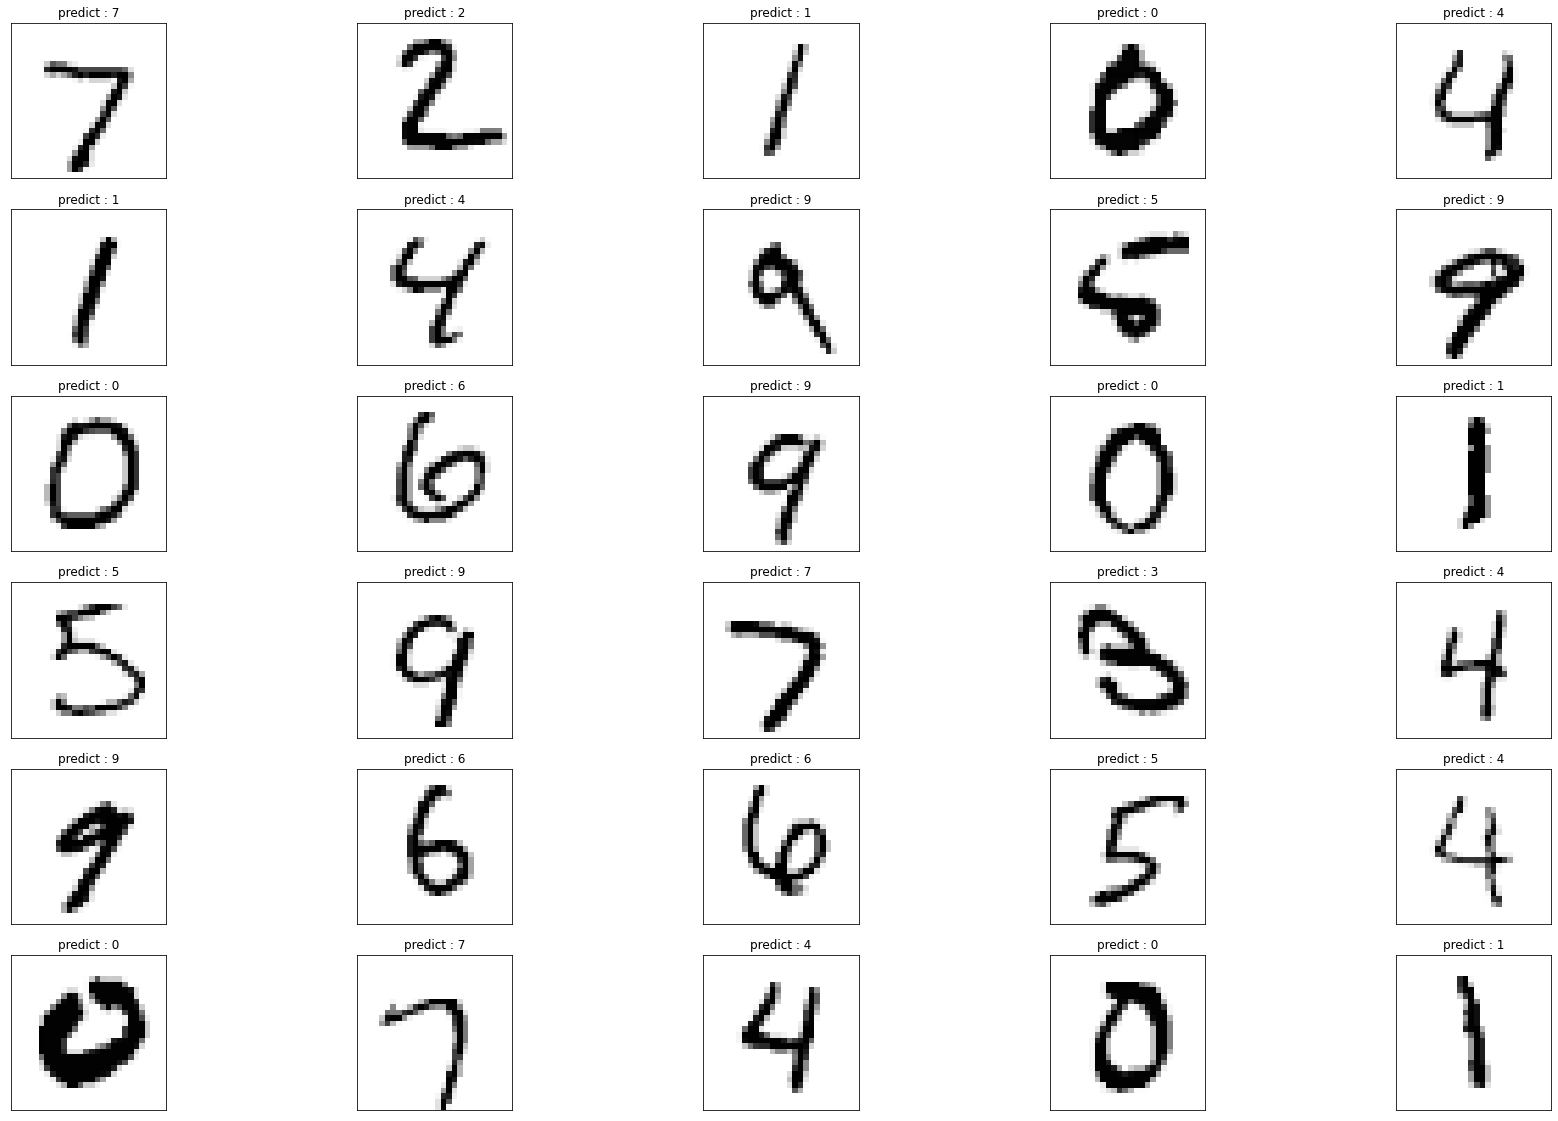

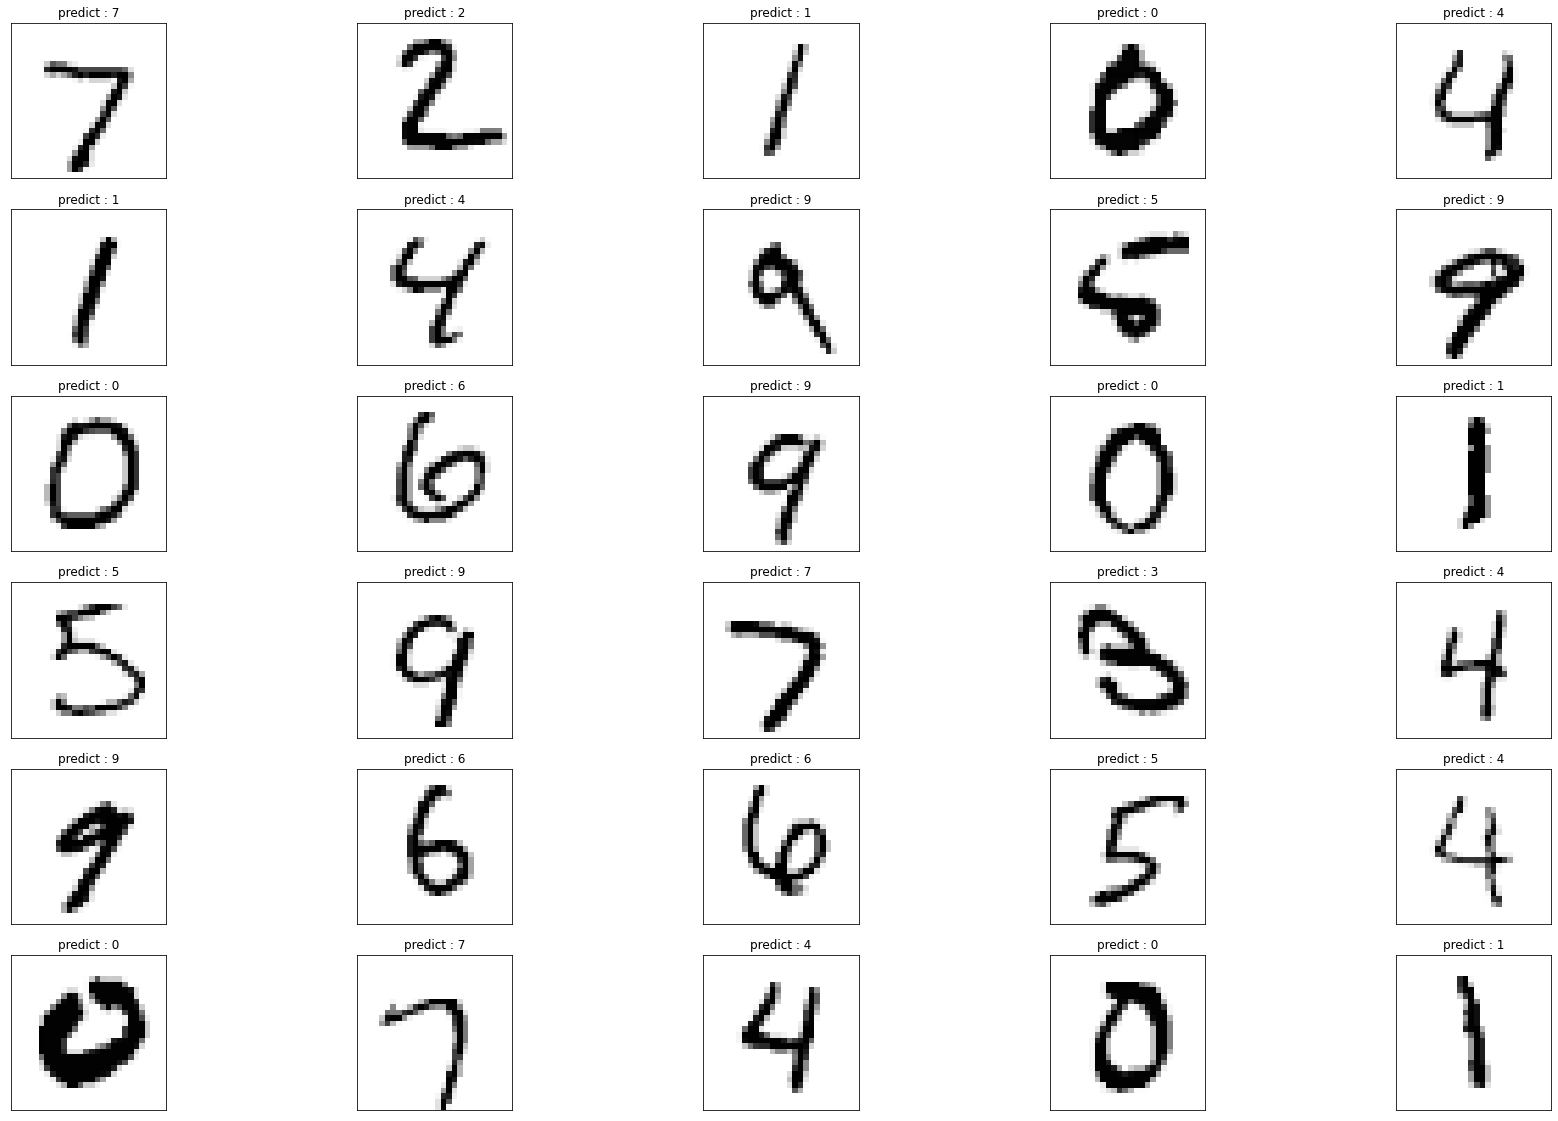

In [54]:
fig = plt.figure(figsize = (30, 20))
for i in range(30):
  subplot = fig.add_subplot(6, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.set_title('predict : %d' % predict01[i])
  subplot.imshow(X_test[i].reshape((28 ,28)), cmap = 'Greys')

plt.show()

## 이미지 읽기 - 부풀리기

- 565 ~ 571

- 572 ~ 581

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [56]:
train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/dental_image/test'

In [58]:
# 너비
IM_WIDTH = 220

# 높이
IM_HEIGHT = 220

In [59]:
# 이미지 읽을 객체
datagen = ImageDataGenerator()

# flow_from_directory : 디렉토리에서 이미지 읽을 객체 생성
# class_mode = 'categorical' : 다중 분류
# batch_size = 10 :  한번에 리턴할 이미지 개수 30개
train_generator = datagen.flow_from_directory(train_path,
                            target_size = (IM_WIDTH, IM_HEIGHT),
                            batch_size = 30,
                            class_mode = 'categorical',
                            shuffle =False
                            )

# 전체 이미지 개수 호가인
print(train_generator.n)

# 배치사이즈 확인
print(train_generator.batch_size)

Found 150 images belonging to 3 classes.
150
30


In [69]:
img, label = train_generator.next()

# 각 줄의 최댓값 인덱스 리턴 (정답)
label_num = np.argmax(label, 1)

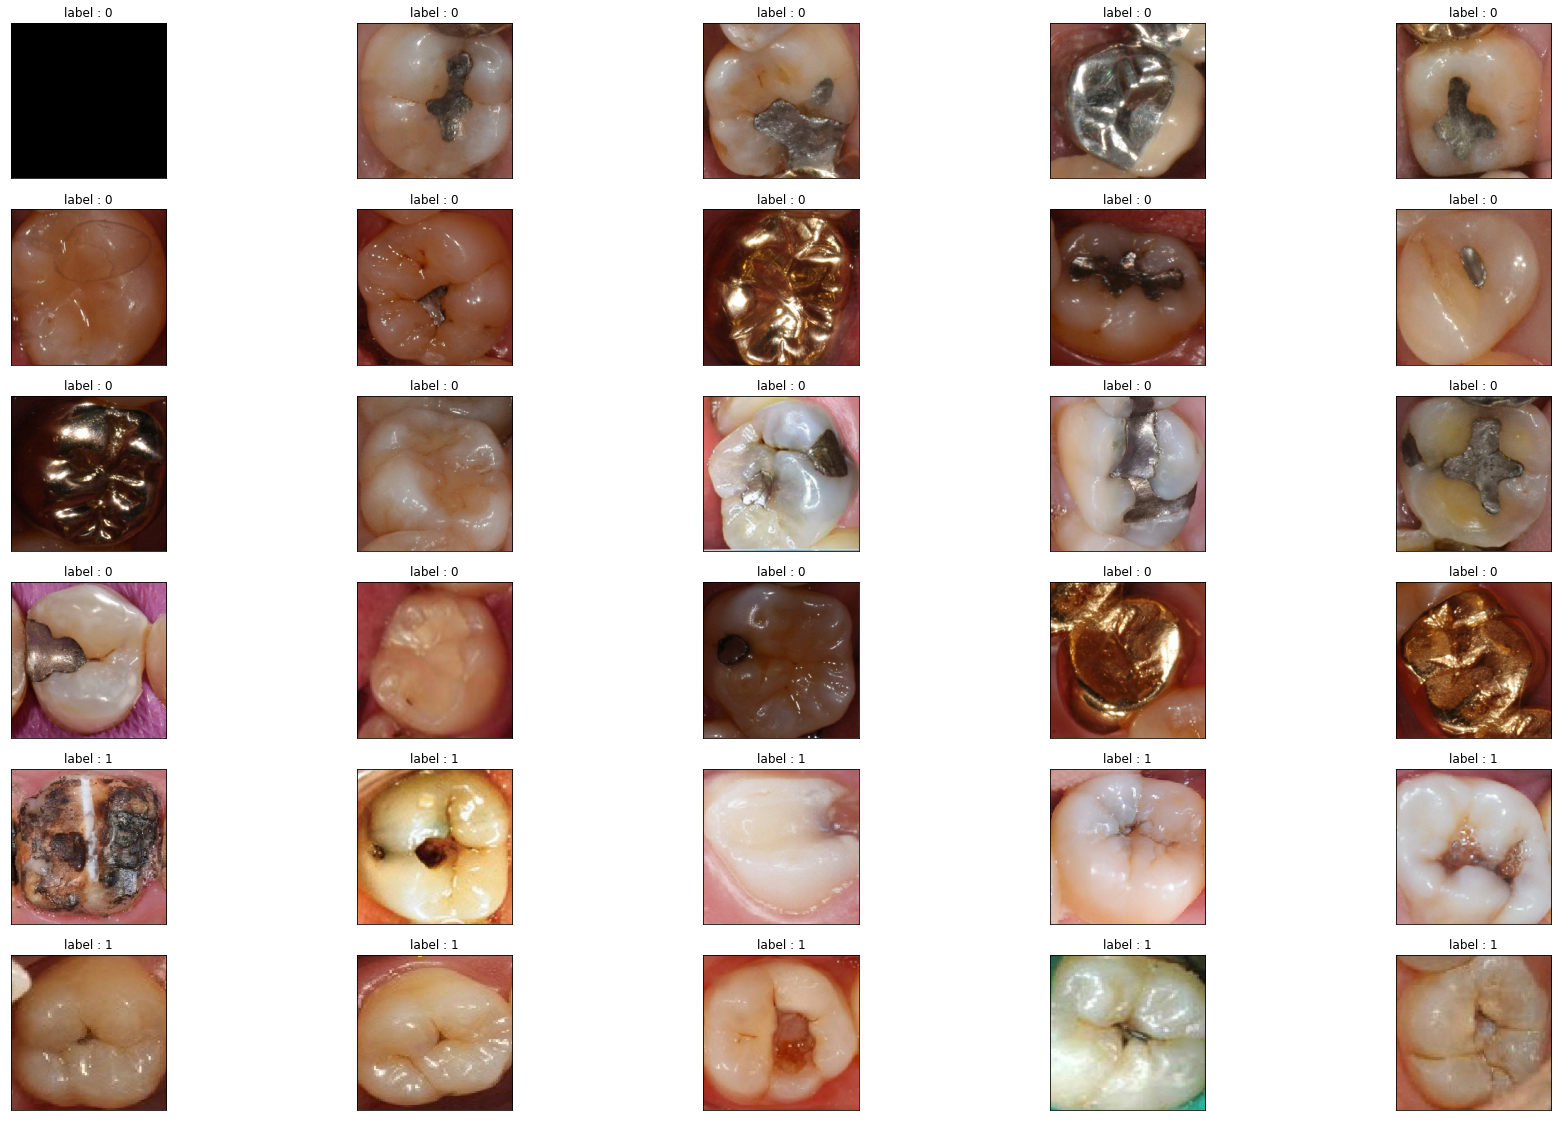

In [72]:
fig = plt.figure(figsize = (30, 20))
for i in range(30):
  subplot = fig.add_subplot(6, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.set_title('label : %d' % label_num[i])
  img[i] = img[i]/255.0
  subplot.imshow(img[i].reshape((IM_WIDTH, IM_HEIGHT,3)))

plt.show()

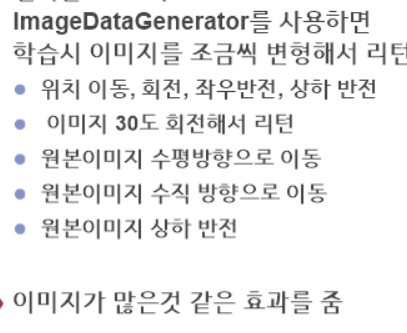

In [74]:
# 이미지 증강
datagen = ImageDataGenerator(
                rotation_range = 180, # 최대 180도 회전
                width_shift_range = 0.2, # 좌우 이동 최대 20%
                height_shift_range = 0.2, # 상하 이동 최대 20%
                horizontal_flip = True, # 좌우반전
                vertical_flip = True # 상하 반전
            )

In [75]:
train_generator = datagen.flow_from_directory(
                        train_path,
                        target_size = (IM_HEIGHT, IM_WIDTH),
                        batch_size = 1,
                        class_mode = 'categorical',
                        shuffle = False
)

Found 150 images belonging to 3 classes.


In [ ]:
img, label = train_generator.next()

# 각 줄의 최댓값 인덱스 리턴 (정답)
label_num = np.argmax(label, 1)

# 255로 나눠서 0~ 1사이 값으로 변환
img = img/ 255.0


In [76]:
index = 0

# 증강 데이터 저장할 리스트
all_generate_img = []

for i in datagen.flow(img):
  all_generate_img.append(i)

  index +=1
  if index > 20:
    break

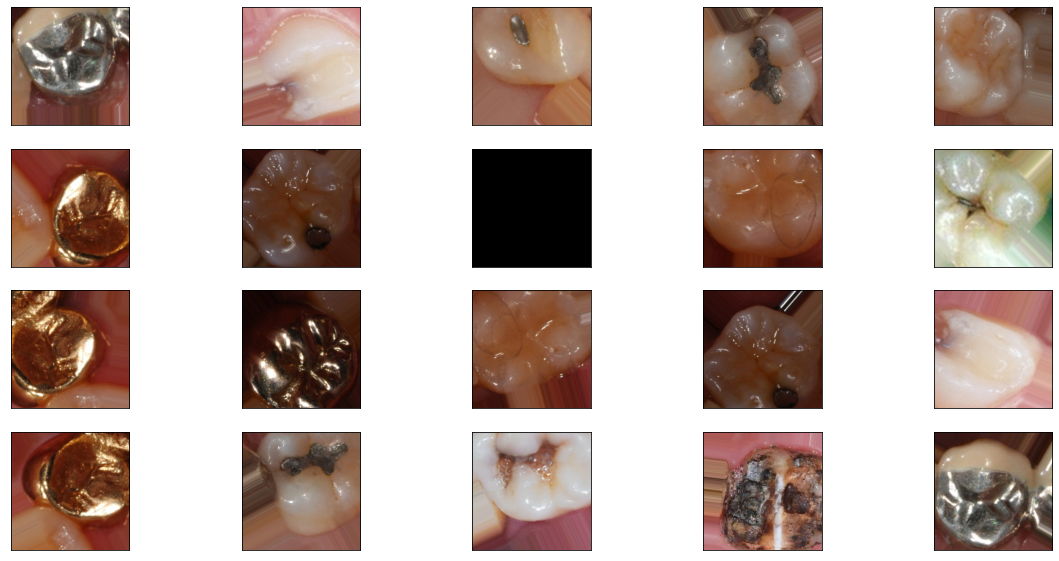

In [78]:
fig = plt.figure(figsize = (20, 10))
for i in range(20):
  subplot = fig.add_subplot(4, 5, i+1)

  subplot.set_xticks([])
  subplot.set_yticks([])

  subplot.imshow(all_generate_img[i][0])
plt.show()